<a href="https://colab.research.google.com/github/Callum-Roberts713/MiscPythonCode/blob/main/TensorFlowTest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense , Dropout , Flatten
from keras.layers import Conv2D , MaxPooling2D
from keras import backend as K
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
import matplotlib.pyplot as plt
batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows , img_cols = 28, 28

# the data , shuffled and split between train and test sets

In [ ]:
(x_train , y_train), (x_test , y_test) = mnist.load_data ()

if K.image_data_format () == 'channels_first':
  x_train = x_train.reshape(x_train.shape[0], 1, img_rows , img_cols)
  x_test = x_test.reshape(x_test.shape[0], 1, img_rows , img_cols)
  input_shape = (1, img_rows , img_cols)
else:
  x_train = x_train.reshape(x_train.shape[0], img_rows , img_cols , 1)
  x_test = x_test.reshape(x_test.shape[0], img_rows , img_cols , 1)
  input_shape = (img_rows , img_cols , 1)

  x_train = x_train.astype('float32')
  x_test = x_test.astype('float32')
  x_train /= 255
  x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape [0], 'train samples')
print(x_test.shape [0], 'test samples' )

# convert class vectors to binary class matrices
y_train = keras.utils.np_utils.to_categorical(y_train , num_classes)
y_test = keras.utils.np_utils.to_categorical(y_test , num_classes)

11501568/11490434 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [ ]:
model = Sequential ()
model.add(Conv2D (32, kernel_size =(3, 3),
activation='relu',
input_shape=input_shape))
model.add(Conv2D (64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size =(2, 2)))
model.add(Dropout (0))
model.add(Flatten ())
model.add(Dense (128, activation='relu'))
model.add(Dropout (0.2))
model.add(Dense(num_classes , activation='softmax'))
model.summary ()

model.compile(loss=keras.losses.categorical_crossentropy ,
optimizer= tf.keras.optimizers.Adamax(),
metrics =['accuracy'])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_7 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 12, 12, 64)        0         
                                                                 
 flatten_3 (Flatten)         (None, 9216)              0         
                                                                 
 dense_6 (Dense)             (None, 128)               1179776   
                                                      

In [ ]:
history = model.fit(x_train , y_train ,
batch_size=batch_size ,
epochs=epochs ,
verbose=1,
validation_data =(x_test , y_test))
score = model.evaluate(x_test , y_test , verbose =0)
print('Test loss:', score [0])
print('Test accuracy:', score [1])

Epoch 1/12
469/469 [==============================] - 8s 16ms/step - loss: 0.2499 - accuracy: 0.9262 - val_loss: 0.0713 - val_accuracy: 0.9784
Epoch 2/12
469/469 [==============================] - 8s 16ms/step - loss: 0.0787 - accuracy: 0.9762 - val_loss: 0.0495 - val_accuracy: 0.9841
Epoch 3/12
469/469 [==============================] - 7s 16ms/step - loss: 0.0556 - accuracy: 0.9831 - val_loss: 0.0381 - val_accuracy: 0.9869
Epoch 4/12
469/469 [==============================] - 8s 16ms/step - loss: 0.0438 - accuracy: 0.9866 - val_loss: 0.0366 - val_accuracy: 0.9882
Epoch 5/12
469/469 [==============================] - 7s 16ms/step - loss: 0.0345 - accuracy: 0.9897 - val_loss: 0.0339 - val_accuracy: 0.9889
Epoch 6/12
469/469 [==============================] - 7s 16ms/step - loss: 0.0287 - accuracy: 0.9912 - val_loss: 0.0344 - val_accuracy: 0.9885
Epoch 7/12
469/469 [==============================] - 7s 16ms/step - loss: 0.0253 - accuracy: 0.9921 - val_loss: 0.0309 - val_accuracy: 0.9896

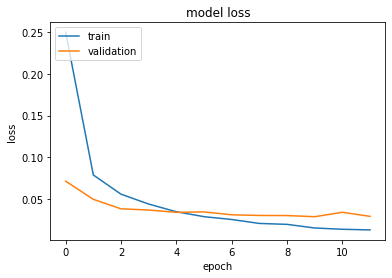

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()